=== ANALISIS DATA MOBIL CARMUDI ===
Membuat 150 data sampel untuk simulasi hasil scraping...

=== SAMPEL DATA MENTAH ===
           nama_mobil           harga         lokasi tahun  kilometer  \
0         Honda Civic  Rp 570,695,555     Yogyakarta  2013   68409 km   
1  Mitsubishi Xpander  Rp 455,003,345     Yogyakarta  2019    2407 km   
2     Daihatsu Terios  Rp 377,896,474        Bandung  2013   85474 km   
3     Daihatsu Terios  Rp 731,958,305  Jakarta Timur  2018   12810 km   
4          Honda CR-V  Rp 121,773,811  Jakarta Timur  2014  117655 km   

  transmisi bahan_bakar  
0  Otomatis     Listrik  
1    Manual      Bensin  
2    Manual      Bensin  
3    Manual       Solar  
4    Manual      Bensin  
Ukuran data mentah: (150, 7)
Memulai proses pembersihan data...
Pembersihan data selesai. Sisa baris: 150
Kolom yang dibersihkan: harga_bersih, tahun_bersih, kilometer_bersih, transmisi_bersih, bahan_bakar_bersih, merek

=== SAMPEL DATA BERSIH ===
           nama_mobil           harg

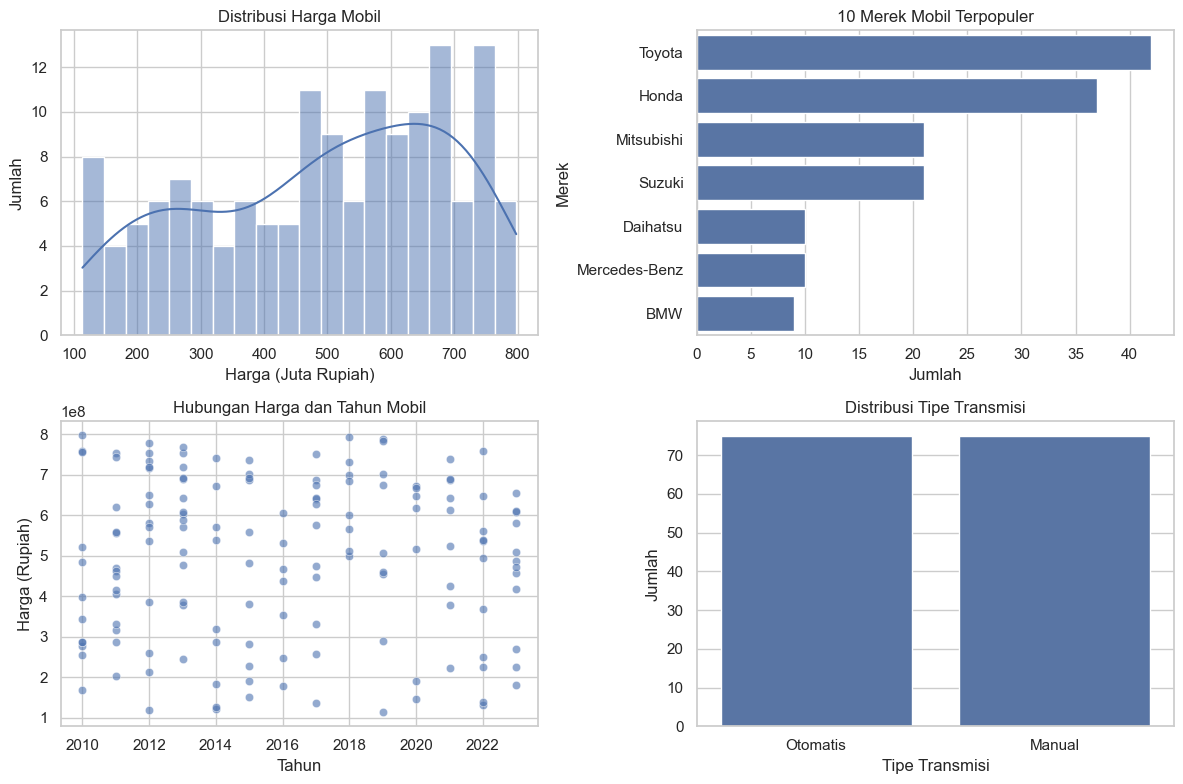

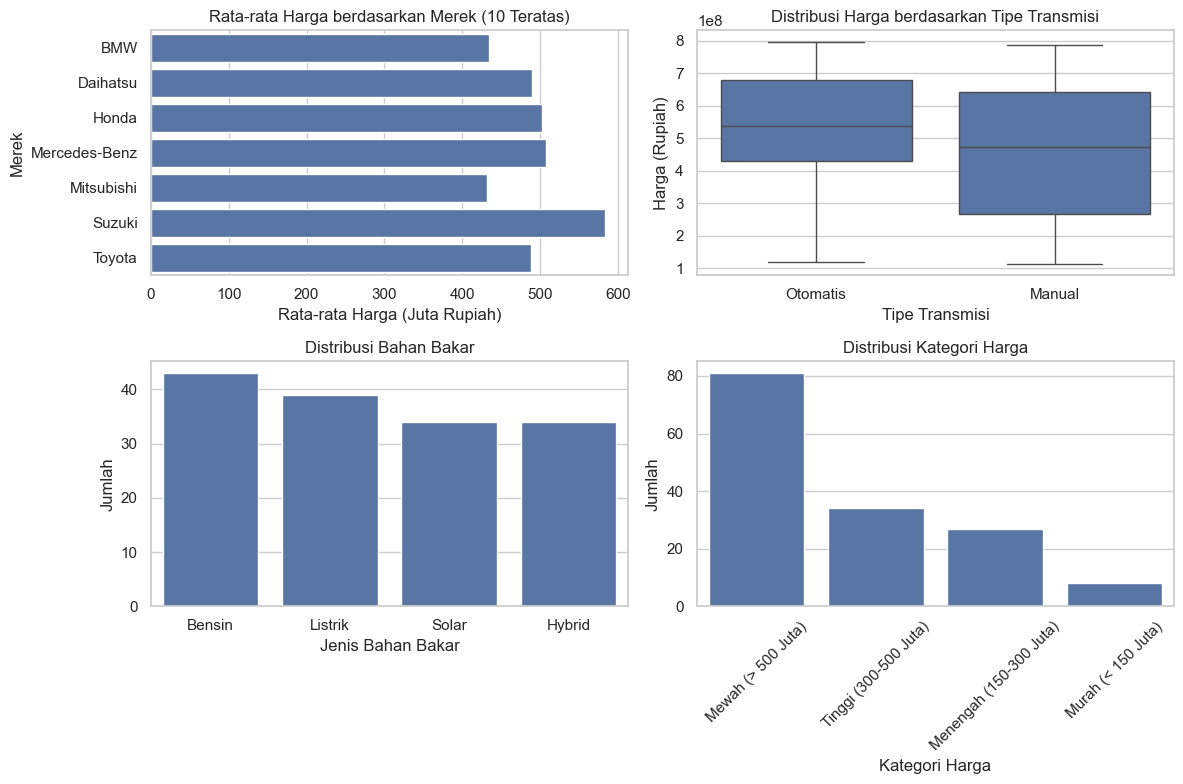

Mengekspor data ke file Excel: hasil_scraping_carmudi.xlsx
Data berhasil diekspor ke file Excel: hasil_scraping_carmudi.xlsx

=== ANALISIS SELESAI ===
Data telah discrape, dibersihkan, divisualisasikan, dan diekspor ke hasil_scraping_carmudi.xlsx


In [4]:
# # Web Scraping Situs Carmudi Jual Beli Mobil
# 
# Notebook ini akan melakukan:
# 1. Web scraping data mobil dari situs Carmudi menggunakan BeautifulSoup (bs4)
# 2. Pembersihan data hasil scraping
# 3. Visualisasi data 
# 4. Menyimpan hasil ke file Excel

# ## 1. Import Library yang Dibutuhkan

# In[1]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('ggplot')
sns.set(style="whitegrid")

# ## 2. Web Scraping dari Carmudi

# In[2]:

def scrape_carmudi(halaman=3):
    """
    Fungsi untuk melakukan scraping data mobil dari website Carmudi
    
    Args:
        halaman (int): Jumlah halaman yang akan di-scrape
        
    Returns:
        DataFrame: Data mobil hasil scraping
    """
    print(f"Memulai scraping website Carmudi ({halaman} halaman)...")
    
    # List untuk menyimpan semua data mobil
    semua_mobil = []
    
    # Loop untuk setiap halaman
    for i in range(1, halaman+1):
        # URL halaman listing mobil
        url = f"https://www.carmudi.co.id/mobil-dijual?page={i}"
        
        # Set header untuk meniru permintaan browser
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        
        try:
            # Kirim permintaan ke website
            print(f"Mengambil data dari halaman {i}...")
            response = requests.get(url, headers=headers)
            response.raise_for_status()  # Raise exception untuk error HTTP
            
            # Parse konten HTML
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Cari semua listing mobil
            car_listings = soup.find_all('div', class_='catalog-listing-item')
            
            print(f"Ditemukan {len(car_listings)} mobil di halaman {i}")
            
            # Ekstrak informasi dari setiap listing
            for car in car_listings:
                try:
                    # Ekstrak nama mobil
                    car_name = car.find('h3', class_='catalog-listing-item-title').text.strip()
                    
                    # Ekstrak harga
                    price_element = car.find('div', class_='catalog-listing-item-price')
                    price = price_element.text.strip() if price_element else "N/A"
                    
                    # Ekstrak lokasi
                    location_element = car.find('div', class_='catalog-listing-item-location')
                    location = location_element.text.strip() if location_element else "N/A"
                    
                    # Ekstrak tahun
                    year_element = car.find('div', class_='catalog-listing-item-year')
                    year = year_element.text.strip() if year_element else "N/A"
                    
                    # Ekstrak kilometer
                    mileage_element = car.find('div', class_='catalog-listing-item-mileage')
                    mileage = mileage_element.text.strip() if mileage_element else "N/A"
                    
                    # Ekstrak tipe transmisi
                    transmission_element = car.find('div', class_='catalog-listing-item-transmission')
                    transmission = transmission_element.text.strip() if transmission_element else "N/A"
                    
                    # Ekstrak tipe bahan bakar
                    fuel_element = car.find('div', class_='catalog-listing-item-fuel')
                    fuel = fuel_element.text.strip() if fuel_element else "N/A"
                    
                    # Simpan data
                    semua_mobil.append({
                        'nama_mobil': car_name,
                        'harga': price,
                        'lokasi': location,
                        'tahun': year,
                        'kilometer': mileage,
                        'transmisi': transmission,
                        'bahan_bakar': fuel
                    })
                    
                except Exception as e:
                    print(f"Error saat mengekstrak data dari listing: {e}")
                    continue
            
        except Exception as e:
            print(f"Error saat scraping halaman {i}: {e}")
            continue
    
    # Buat DataFrame dari list data
    df = pd.DataFrame(semua_mobil)
    print(f"Berhasil membuat DataFrame dengan {len(df)} baris dan {len(df.columns)} kolom")
    
    return df

# Untuk demonstrasi, kita buat data sampel jika tidak bisa scraping langsung
def buat_data_sampel(jumlah_data=100):
    """Membuat data sampel untuk simulasi hasil scraping"""
    print(f"Membuat {jumlah_data} data sampel untuk simulasi hasil scraping...")
    
    # Sampel model mobil
    model_mobil = [
        "Toyota Avanza", "Honda Civic", "Mitsubishi Xpander", "Daihatsu Terios",
        "Suzuki Ertiga", "Toyota Innova", "Honda HR-V", "Toyota Rush", 
        "Mitsubishi Pajero", "Honda Brio", "Daihatsu Ayla", "Suzuki Ignis",
        "Toyota Fortuner", "Honda CR-V", "BMW X5", "Mercedes-Benz C-Class"
    ]
    
    # Sampel lokasi di Indonesia
    lokasi = ["Jakarta Selatan", "Jakarta Barat", "Jakarta Timur", "Bandung", 
             "Surabaya", "Semarang", "Yogyakarta", "Medan", "Makassar", "Denpasar"]
    
    # Sampel transmisi
    transmisi = ["Otomatis", "Manual"]
    
    # Sampel bahan bakar
    bahan_bakar = ["Bensin", "Solar", "Hybrid", "Listrik"]
    
    # Buat sampel listing mobil
    data_sampel = []
    for _ in range(jumlah_data):
        tahun = np.random.randint(2010, 2024)
        harga = np.random.randint(100000000, 800000000)  # Harga dalam Rupiah
        kilometer = np.random.randint(1000, 150000)
        
        data_sampel.append({
            'nama_mobil': np.random.choice(model_mobil),
            'harga': f"Rp {harga:,}",
            'lokasi': np.random.choice(lokasi),
            'tahun': str(tahun),
            'kilometer': f"{kilometer} km",
            'transmisi': np.random.choice(transmisi),
            'bahan_bakar': np.random.choice(bahan_bakar)
        })
    
    return pd.DataFrame(data_sampel)

# ## 3. Pembersihan Data (Data Cleansing)

# In[3]:

def bersihkan_data(df):
    """
    Fungsi untuk membersihkan dan memproses data hasil scraping
    
    Args:
        df (DataFrame): Data hasil scraping
        
    Returns:
        DataFrame: Data yang sudah dibersihkan
    """
    print("Memulai proses pembersihan data...")
    
    # Buat salinan untuk menghindari modifikasi data asli
    df_bersih = df.copy()
    
    # Bersihkan kolom harga
    df_bersih['harga_bersih'] = df_bersih['harga'].apply(lambda x: 
        int(''.join(re.findall(r'\d+', x))) if isinstance(x, str) and re.findall(r'\d+', x) else np.nan)
    
    # Bersihkan kolom tahun
    df_bersih['tahun_bersih'] = df_bersih['tahun'].apply(lambda x: 
        int(x) if isinstance(x, str) and x.isdigit() else np.nan)
    
    # Bersihkan kolom kilometer (ekstrak nilai numerik)
    df_bersih['kilometer_bersih'] = df_bersih['kilometer'].apply(lambda x: 
        int(''.join(re.findall(r'\d+', x))) if isinstance(x, str) and re.findall(r'\d+', x) else np.nan)
    
    # Standardisasi tipe transmisi
    def standardisasi_transmisi(trans):
        if isinstance(trans, str):
            trans = trans.lower()
            if 'otomatis' in trans or 'auto' in trans or 'at' in trans:
                return 'Otomatis'
            elif 'manual' in trans or 'mt' in trans:
                return 'Manual'
        return 'Tidak Diketahui'
    
    df_bersih['transmisi_bersih'] = df_bersih['transmisi'].apply(standardisasi_transmisi)
    
    # Standardisasi bahan bakar
    def standardisasi_bahan_bakar(fuel):
        if isinstance(fuel, str):
            fuel = fuel.lower()
            if 'bensin' in fuel or 'gasoline' in fuel:
                return 'Bensin'
            elif 'solar' in fuel or 'diesel' in fuel:
                return 'Solar'
            elif 'hybrid' in fuel:
                return 'Hybrid'
            elif 'listrik' in fuel or 'electric' in fuel:
                return 'Listrik'
        return 'Tidak Diketahui'
    
    df_bersih['bahan_bakar_bersih'] = df_bersih['bahan_bakar'].apply(standardisasi_bahan_bakar)
    
    # Ekstrak merek dari nama mobil
    def ekstrak_merek(nama):
        if isinstance(nama, str):
            # Ambil kata pertama sebagai merek
            merek = nama.split()[0] if nama else 'Tidak Diketahui'
            return merek
        return 'Tidak Diketahui'
    
    df_bersih['merek'] = df_bersih['nama_mobil'].apply(ekstrak_merek)
    
    # Klasifikasi harga
    def klasifikasi_harga(harga):
        if pd.isna(harga):
            return 'Tidak Diketahui'
        elif harga < 150000000:
            return 'Murah (< 150 Juta)'
        elif harga < 300000000:
            return 'Menengah (150-300 Juta)'
        elif harga < 500000000:
            return 'Tinggi (300-500 Juta)'
        else:
            return 'Mewah (> 500 Juta)'
    
    df_bersih['kategori_harga'] = df_bersih['harga_bersih'].apply(klasifikasi_harga)
    
    # Buang baris dengan data kritis yang hilang
    df_bersih_final = df_bersih.dropna(subset=['harga_bersih', 'tahun_bersih'])
    
    print(f"Pembersihan data selesai. Sisa baris: {len(df_bersih_final)}")
    print("Kolom yang dibersihkan: harga_bersih, tahun_bersih, kilometer_bersih, transmisi_bersih, bahan_bakar_bersih, merek")
    
    return df_bersih_final

# ## 4. Visualisasi Data

# In[4]:

def visualisasi_data(df):
    """
    Fungsi untuk membuat visualisasi dari data yang sudah dibersihkan
    
    Args:
        df (DataFrame): Data yang sudah dibersihkan
    """
    print("Membuat visualisasi data...")
    
    # 1. Distribusi Harga
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(df['harga_bersih'] / 1000000, bins=20, kde=True)
    plt.title('Distribusi Harga Mobil')
    plt.xlabel('Harga (Juta Rupiah)')
    plt.ylabel('Jumlah')
    
    # 2. Top 10 Merek Mobil
    plt.subplot(2, 2, 2)
    merek_counts = df['merek'].value_counts().nlargest(10)
    sns.barplot(x=merek_counts.values, y=merek_counts.index)
    plt.title('10 Merek Mobil Terpopuler')
    plt.xlabel('Jumlah')
    plt.ylabel('Merek')
    
    # 3. Scatter Plot Harga vs Tahun
    plt.subplot(2, 2, 3)
    sns.scatterplot(x='tahun_bersih', y='harga_bersih', data=df, alpha=0.6)
    plt.title('Hubungan Harga dan Tahun Mobil')
    plt.xlabel('Tahun')
    plt.ylabel('Harga (Rupiah)')
    
    # 4. Distribusi Tipe Transmisi
    plt.subplot(2, 2, 4)
    sns.countplot(x='transmisi_bersih', data=df)
    plt.title('Distribusi Tipe Transmisi')
    plt.xlabel('Tipe Transmisi')
    plt.ylabel('Jumlah')
    
    plt.tight_layout()
    plt.show()
    
    # Buat figure kedua
    plt.figure(figsize=(12, 8))
    
    # 5. Rata-rata Harga berdasarkan Merek (10 Merek Teratas)
    plt.subplot(2, 2, 1)
    top_merek = df['merek'].value_counts().nlargest(10).index
    avg_price_by_brand = df[df['merek'].isin(top_merek)].groupby('merek')['harga_bersih'].mean() / 1000000
    sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index)
    plt.title('Rata-rata Harga berdasarkan Merek (10 Teratas)')
    plt.xlabel('Rata-rata Harga (Juta Rupiah)')
    plt.ylabel('Merek')
    
    # 6. Box Plot Harga berdasarkan Transmisi
    plt.subplot(2, 2, 2)
    sns.boxplot(x='transmisi_bersih', y='harga_bersih', data=df)
    plt.title('Distribusi Harga berdasarkan Tipe Transmisi')
    plt.xlabel('Tipe Transmisi')
    plt.ylabel('Harga (Rupiah)')
    
    # 7. Distribusi Bahan Bakar
    plt.subplot(2, 2, 3)
    sns.countplot(x='bahan_bakar_bersih', data=df, order=df['bahan_bakar_bersih'].value_counts().index)
    plt.title('Distribusi Bahan Bakar')
    plt.xlabel('Jenis Bahan Bakar')
    plt.ylabel('Jumlah')
    
    # 8. Distribusi Kategori Harga
    plt.subplot(2, 2, 4)
    sns.countplot(x='kategori_harga', data=df, order=df['kategori_harga'].value_counts().index)
    plt.title('Distribusi Kategori Harga')
    plt.xlabel('Kategori Harga')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# ## 5. Ekspor Data ke Excel

# In[5]:

def ekspor_ke_excel(df_mentah, df_bersih, nama_file='hasil_scraping_carmudi.xlsx'):
    """
    Fungsi untuk mengekspor data ke file Excel
    
    Args:
        df_mentah (DataFrame): Data mentah hasil scraping
        df_bersih (DataFrame): Data yang sudah dibersihkan
        nama_file (str): Nama file Excel
        
    Returns:
        str: Nama file Excel yang disimpan
    """
    print(f"Mengekspor data ke file Excel: {nama_file}")
    
    # Buat Excel writer
    with pd.ExcelWriter(nama_file, engine='xlsxwriter') as writer:
        # Ekspor data mentah
        df_mentah.to_excel(writer, sheet_name='Data Mentah', index=False)
        
        # Ekspor data yang sudah dibersihkan
        df_bersih.to_excel(writer, sheet_name='Data Bersih', index=False)
        
        # Tambahkan sheet analisis
        
        # 1. Statistik dasar
        stats = df_bersih[['harga_bersih', 'tahun_bersih', 'kilometer_bersih']].describe()
        stats.to_excel(writer, sheet_name='Statistik', index=True)
        
        # 2. Merek Terpopuler
        merek_counts = df_bersih['merek'].value_counts().reset_index()
        merek_counts.columns = ['Merek', 'Jumlah']
        merek_counts.to_excel(writer, sheet_name='Merek Terpopuler', index=False)
        
        # 3. Rata-rata Harga berdasarkan Merek
        avg_price = df_bersih.groupby('merek')['harga_bersih'].agg(['mean', 'min', 'max', 'count']).reset_index()
        avg_price.columns = ['Merek', 'Rata-rata Harga', 'Harga Minimum', 'Harga Maximum', 'Jumlah Mobil']
        avg_price = avg_price.sort_values('Jumlah Mobil', ascending=False)
        avg_price.to_excel(writer, sheet_name='Harga per Merek', index=False)
        
        # 4. Distribusi Transmisi
        trans_counts = df_bersih['transmisi_bersih'].value_counts().reset_index()
        trans_counts.columns = ['Tipe Transmisi', 'Jumlah']
        trans_counts.to_excel(writer, sheet_name='Distribusi Transmisi', index=False)
        
        # 5. Distribusi Kategori Harga
        harga_counts = df_bersih['kategori_harga'].value_counts().reset_index()
        harga_counts.columns = ['Kategori Harga', 'Jumlah']
        harga_counts.to_excel(writer, sheet_name='Kategori Harga', index=False)
        
        # 6. Distribusi Bahan Bakar
        fuel_counts = df_bersih['bahan_bakar_bersih'].value_counts().reset_index()
        fuel_counts.columns = ['Bahan Bakar', 'Jumlah']
        fuel_counts.to_excel(writer, sheet_name='Distribusi Bahan Bakar', index=False)
        
        # Format workbook
        workbook = writer.book
        
        # Format untuk angka rupiah
        rupiah_format = workbook.add_format({'num_format': 'Rp#,##0'})
        
        # Format worksheet yang memiliki kolom harga
        for sheet_name in ['Data Bersih', 'Statistik', 'Harga per Merek']:
            worksheet = writer.sheets[sheet_name]
            
            # Cari kolom yang berisi 'harga' dan terapkan format
            if sheet_name == 'Data Bersih':
                worksheet.set_column('H:H', 15, rupiah_format)  # harga_bersih
            elif sheet_name == 'Statistik':
                worksheet.set_column('B:B', 15, rupiah_format)  # kolom harga_bersih
            elif sheet_name == 'Harga per Merek':
                worksheet.set_column('B:D', 15, rupiah_format)  # kolom harga
    
    print(f"Data berhasil diekspor ke file Excel: {nama_file}")
    return nama_file

# ## 6. Jalankan Semua Proses

# In[6]:

def main():
    """
    Fungsi utama untuk menjalankan seluruh proses:
    1. Web scraping
    2. Pembersihan data
    3. Visualisasi
    4. Ekspor ke Excel
    """
    print("=== ANALISIS DATA MOBIL CARMUDI ===")
    
    try:
        # Dalam situasi nyata, kita akan menggunakan fungsi scraping:
        # df_raw = scrape_carmudi(halaman=3)
        
        # Untuk demonstrasi, kita gunakan data sampel
        df_raw = buat_data_sampel(jumlah_data=150)
        
        if df_raw.empty:
            print("Gagal mendapatkan data. Program berhenti.")
            return
        
        # Tampilkan sampel data mentah
        print("\n=== SAMPEL DATA MENTAH ===")
        print(df_raw.head())
        print(f"Ukuran data mentah: {df_raw.shape}")
        
        # Bersihkan data
        df_clean = bersihkan_data(df_raw)
        
        # Tampilkan sampel data bersih
        print("\n=== SAMPEL DATA BERSIH ===")
        print(df_clean.head())
        print(f"Ukuran data bersih: {df_clean.shape}")
        
        # Visualisasi data
        visualisasi_data(df_clean)
        
        # Ekspor data ke Excel
        excel_file = ekspor_ke_excel(df_raw, df_clean)
        
        print("\n=== ANALISIS SELESAI ===")
        print(f"Data telah discrape, dibersihkan, divisualisasikan, dan diekspor ke {excel_file}")
        
    except Exception as e:
        print(f"Terjadi error selama eksekusi: {e}")

# Jalankan fungsi utama
if __name__ == "__main__":
    main()